# Programmering endrer fagene
Denne økta handler om hvordan programmering kan endre fagene når vi ikke lenger er begrenset av hva som er analytisk løsbart eller elevenes matematiske kompetanse. 

Vi starter med å se på mekanikken, men vi kunne like gjerne hentet eksempler fra andre fagområder. I ungdomsskolen lærer elevene om sammenhengen mellom posisjon, fart og akselerasjon. Der lærer de også om krefter og energi. Men det er svært begrenset hva de kan se på av virkelighetsnære problemstillinger. 

I Fysikk 1 på videregående skole tas mekanikken litt lenger og en enkel modell for friksjon blir introdusert. Likevel er det begrenset hva elevene kan modellere pga manglende matematikkompetanse. 

## Fallende muffinsformer
La oss se på fall med luftmotstand. Mange lærere har nok sluppet en og to muffinsformer for å illustrere at luftmotstanden øker med kvadratet av farten. En algebraisk øvelse på dette gir oss at hvis vi holder en muffinsform i en gitt høyde $H$ over bakken og så to oppi hverandre i høyden $\sqrt{2}\cdot{H}$, så vil de to muffinsformene treffe bakken på likt. 

Men hva om vi vil studere hele bevegelsen og plotte f.eks. tid og fart? Vi kunne bruke en bevegelsessensor til å logge posisjon som funksjon av tid når muffinsformene faller, og så forsøke å lage en modell som beskriver bevegelsen.

Med Newtons andre lov og kunnskap om sammenhengen mellom posisjon, fart og akselerasjon har elevene nok kompetanse til å programmere dette for å finne en løsning. 

### Underveisoppgave
1. Lag et fri-legeme diagram av en fallende muffinsform (med luftmostand!). Vi setter tyngden $G=mg$ og luftmotstanden $L=kv^{2}$.
2. Bruk Newtons andre lov og forklar at denne gir oss følgende differensiallikning: 
$\frac{dv}{dt}=g-\frac{k}{m}v^2.$ Hvordan kan vi bruke differensialligningen til å regne ut aksellerasjonen ved gitt tidspunkt når hastigheten er gitt?
3. Forklar hvorfor vi kan skrive $v_{i+1}=v_{i}+a_{i}\cdot{dt} $ når vi tar små tidssteg. Her er $v_i$ tilnærmet hastighet ved tidspunkt $t_i$ og $v_{i+1}$ tilnærmet hastighet ved tidspunkt $t_{i+1}$.

Vi prøver oss på selve programmeringen! 

In [3]:
#Fallende muffinsformer


from pylab import *

#Fysiske størrelser
g=9.81  #tyngdeakselerasjon i m/s/s
m=0.5   #masse til gjenstand som faller i kg
k=0.2   #luftmotstandskoeffisient i Nsmm

#Tidsintervaller
N=100000    #antall intervaller
tid=2       #antall sekunder
dt=tid/(N)

#Vektorer/arrays
a=zeros(N)  #akselerasjon i m/s/s
v=zeros(N)  #fart i m/S
s=zeros(N)  #posisjon i m
t=zeros(N)  #tid i sekunder

#Initialbetingelser
v[0]=0  #startfart 0 m/s
s[0]=0  #startposisjon 0

Husk å lage oversiktelige og lesbare programmer - både med tanke på deg selv og elevene. 

Nå har vi lagt klart arrayer med 100000 punkter i hver for både akselerasjon, fart, posisjon og tid. Det neste blir å fylle disse arrayene med tallverdier basert på difflikningen. Det gjør vi med en for-løkke. 

In [4]:
#Eulers metode
for i in range(N-1):
    a[i]=g-(k/m)*v[i]**2   #utledet fra Newtons 2. lov
    v[i+1]=v[i]+a[i]*dt
    s[i+1]=s[i]+v[i]*dt
    t[i+1]=t[i]+dt


### Underveisoppgave
1. Hvorfor bruker vi en for-løkke og ikke en while-løkke her?
2. Hvorfor går løkken til N-1 og ikke til N?
3. Lag en verditabell for a, v og t for de tre første rundene i løkken. Fyll inn tall i tabellen slik at du skriver med ulik farge avhengig av hvilken runde det er i løkken. Beskriv det du ser. 
4. Hva blir  verdien til akselerasjonen i det siste punktet? Kan du fikse på programmet ditt så dette blir løst?


Nå skal vi plotte resultatet. Først velger vi å plotte både akselerasjonsgraf, fartsgraf og veigraf. Du ser at det kommer litt oppi hverandre. Gjør endringer i programmet slik du ønsker for å få et penere resultat. Husk at du kan kommentere ut hele deler av programmet ved å lage """ før og etter de linjene du vil kommentere ut. 

'\nNå har jeg kommentert \nut alle disse\nlinjene \n'

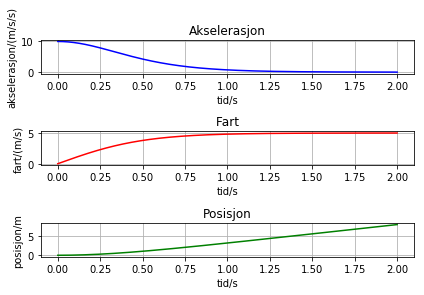

In [5]:
#Plotting
subplot(3,1,1)
plot(t,a,'b-')
title('Akselerasjon')
xlabel('tid/s')
ylabel('akselerasjon/(m/s/s)')
grid()

subplot(3,1,2)
plot(t,v,'r-')
title('Fart')
xlabel('tid/s')
ylabel('fart/(m/s)')
grid()

subplot(3,1,3)
plot(t,s,'g-')
title('Posisjon')
xlabel('tid/s')
ylabel('posisjon/m')
grid()
tight_layout()

"""
Nå har jeg kommentert 
ut alle disse
linjene 
"""

## Litt om modellering
Med dette lille programmet åpner det seg opp mange nye muligheter for å utforske naturvitenskapelige problemstillinger på en ny og dypere måte. 
Elevene kan selv undersøke betydningen av de ulike fysiske størrelsene. Hvor raskt oppnår gjenstanden terminalfart når massen endrer seg? Hva med koeffisienten $k$? Kan vi si noe om denne for ulike gjenstander? Og hva om vi var på månen eller en annen planet? Ved å endre på de fysiske størrelsene i begynnelsen av programmet kan datamaskinen regne ut 100 000 punkter for tid, posisjon, fart og akselerasjon på praktisk talt null tid. Dermed kan elevene bruke mer tid til å bygge en intuisjon for fysikkfaget. 

Vi er heller ikke begrenset av modellen $L=kv^2$. Vi kan lett undersøke helt andre modeller som ikke gir løsbare differensiallikninger, men som kan løses numerisk. Her er det bare fantasien som setter grenser :)

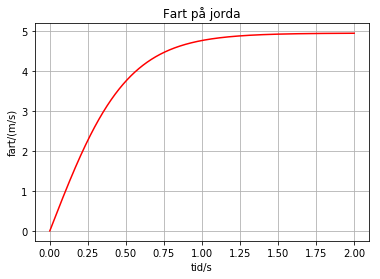

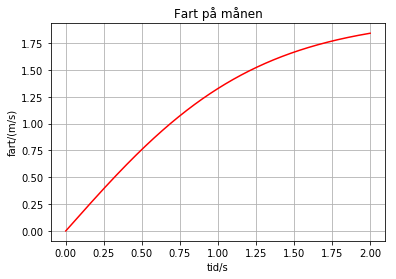

In [4]:
#Fart på jorda eller på månen?

#Jorda
g = 9.8

#Eulers metode
for i in range(N-1):
    a[i]=g-k*v[i]**2/m   #utledet fra Newtons 2. lov
    v[i+1]=v[i]+a[i]*dt
    s[i+1]=s[i]+v[i]*dt
    t[i+1]=t[i]+dt

plot(t,v,'r-')
title('Fart på jorda')
xlabel('tid/s')
ylabel('fart/(m/s)')
grid()
show()

#Månen
g = 1.6

#Eulers metode
for i in range(N-1):
    a[i]=g-k*v[i]**2/m   #utledet fra Newtons 2. lov
    v[i+1]=v[i]+a[i]*dt
    s[i+1]=s[i]+v[i]*dt
    t[i+1]=t[i]+dt
    
plot(t,v,'r-')
title('Fart på månen')
xlabel('tid/s')
ylabel('fart/(m/s)')
grid() 
show()

### Underveisoppgave
Finn ut hvor lang tid det tar før gjenstanden når terminalfart på månen. 
